In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Logistic Regression on Attrition Dataset

In [2]:
dataset1=pd.read_csv("general_data.csv")

In [3]:
dataset1.shape

(4410, 24)

In [4]:
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
dataset1.isna()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
dataset1.dropna(inplace=True)

In [7]:
dataset1.shape

(4382, 24)

In [8]:
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [9]:
# Dropping unnecessary columns
dataset1=dataset1.drop(columns=['EmployeeID','EmployeeCount','Over18','StandardHours',])

In [10]:
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [11]:
# Encoding the attributes
enc_cols=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']
enc=LabelEncoder()
for i in enc_cols:
    dataset1[i] = enc.fit_transform(dataset1[i])

In [12]:
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [13]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   int32  
 2   BusinessTravel           4382 non-null   int32  
 3   Department               4382 non-null   int32  
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   int32  
 7   Gender                   4382 non-null   int32  
 8   JobLevel                 4382 non-null   int64  
 9   JobRole                  4382 non-null   int32  
 10  MaritalStatus            4382 non-null   int32  
 11  MonthlyIncome            4382 non-null   int64  
 12  NumCompaniesWorked       4382 non-null   float64
 13  PercentSalaryHike        4382 non-null   int64  
 14  StockOptionLevel        

In [14]:
# Dataset with only Attrition values
y=dataset1['Attrition']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int32

In [15]:
# Dataset with all values except Attrition values
x=dataset1.drop(columns=['Attrition'])
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [16]:
# Performing Logistic Regression
x1=sm.add_constant(x)
Logistic=sm.Logit(y,x1)
result=Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7


In [17]:
# Results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           19
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                  0.1093
Time:                        21:21:27   Log-Likelihood:                -1721.8
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 8.681e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0270      0.414      0.065      0.948      -0.785       0.839
Age                        -0.0307      0.007     -4.478      0.000      -0.044      -0.017
BusinessTravel             -0.0137      0.066     -0.209      0.834      -0.143       0.115
Department                 -0.2229      0.082     -2.735      0.006      -0.383      -0.063
DistanceFromHome           -0.0012      0.005     -0.231      0.818      -0.012       0.009
Education                  -0.0664      0.043     -1.555      0.120      -0.150       0.017
EducationField             -0.0954      0.034     -2.849      0.004      -0.161      -0.030
Gender                      0.0855      0.090      0.952      0.341      -0.091       0.262
JobLevel                   -0.0285      0.040     -0.716      0.474      -0.107       0.050
JobRole                     0.0400      0.018      2.226      0.026       0.005       0.075
MaritalStatus               0.5835      0.063      9.212      0.000       0.459       0.708
MonthlyIncome           -1.815e-06   9.57e-07     -1.897      0.058   -3.69e-06    6.01e-08
NumCompaniesWorked          0.1174      0.018      6.390      0.000       0.081       0.153
PercentSalaryHike           0.0126      0.012      1.067      0.286      -0.011       0.036
StockOptionLevel           -0.0675      0.052     -1.302      0.193      -0.169       0.034
TotalWorkingYears          -0.0584      0.012     -4.873      0.000      -0.082      -0.035
TrainingTimesLastYear      -0.1443      0.035     -4.097      0.000      -0.213      -0.075
YearsAtCompany              0.0132      0.018      0.718      0.473      -0.023       0.049
YearsSinceLastPromotion     0.1328      0.020      6.479      0.000       0.093       0.173
YearsWithCurrManager       -0.1394      0.022     -6.288      0.000      -0.183      -0.096
===========================================================================================
"""

# Inference from the above Analysis

The factors which highly affect the attrition of employees are:
1. Age
2. MaritalStatus
3. NumCompaniesWorked
4. TotalWorkingYears
5. TrainingTimesLastYear
6. YearsSinceLastPromotion
7. YearsWithCurrManager

The factors which moderately or does not affect the attrition of employees are:
1. Department
2. EducationField
3. JobRole
4. BusinessTravel
5. DistanceFromHome
6. Education
7. Gender
8. JobLevel
9. MonthlyIncome
10. PercentSalaryHike
11. StockOptionLevel
12. YearsAtCompany

# Logistic Regression on Bank Loan Modeling Dataset

In [18]:
dataset2=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")

In [19]:
dataset2.shape

(5000, 14)

In [20]:
dataset2.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [21]:
# checking null values in the dataset
dataset2.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [22]:
# checking duplicate values in the dataset
dataset2.duplicated().sum()

0

In [23]:
# Dropping unnecessary columns
dataset2=dataset2.drop(columns=['ID','ZIP Code'])

In [24]:
dataset2.shape

(5000, 12)

In [25]:
# checking duplicate values in the dataset after removing columns
dataset2.duplicated().sum()

13

In [26]:
# dropping duplicate values
dataset2.drop_duplicates(inplace=True)

In [27]:
dataset2.shape

(4987, 12)

In [28]:
dataset2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [29]:
# Dataset with only Personal Loan values
y1=dataset2['Personal Loan']
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [30]:
# Dataset with all values except Personal Loan values
x1=dataset2.drop(columns=['Personal Loan'])
x1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [31]:
# Performing Logistic Regression
x2=sm.add_constant(x1)
Logistic1=sm.Logit(y1,x2)
result1=Logistic1.fit()

Optimization terminated successfully.
         Current function value: 0.128720
         Iterations 9


In [32]:
# Results
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4975
Method:                           MLE   Df Model:                           11
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                  0.5936
Time:                        21:21:39   Log-Likelihood:                -641.93
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1727      1.645     -7.399      0.000     -15.397      -8.948
Age                   -0.0541      0.061     -0.882      0.378      -0.174       0.066
Experience             0.0642      0.061      1.054      0.292      -0.055       0.184
Income                 0.0545      0.003     20.822      0.000       0.049       0.060
Family                 0.6947      0.074      9.348      0.000       0.549       0.840
CCAvg                  0.1236      0.040      3.117      0.002       0.046       0.201
Education              1.7363      0.115     15.091      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.848      0.396      -0.001       0.002
Securities Account    -0.9371      0.286     -3.280      0.001      -1.497      -0.377
CD Account             3.8181      0.324     11.788      0.000       3.183       4.453
Online                -0.6724      0.157     -4.280      0.000      -0.980      -0.364
CreditCard            -1.1181      0.205     -5.454      0.000      -1.520      -0.716
======================================================================================
"""

# Inference from the above Analysis

The factors which highly affect the personal loan given by bank are:
1. Income
2. Family
3. CCAvg
4. Education
5. Securities Account
6. CD Account
7. Online
8. CreditCard

The factors which moderately or does not affect the personal loan given by bank are:
1. Age
2. Experience
3. Mortgage

# Linear Regression on Real Estate Analysis Dataset

We are going to test 4 models:
1. price/sqft_living
2. price/bedrooms
3. price/bathrooms
4. price/floors

In [33]:
dataset3=pd.read_excel("Linear Regression.xlsx",sheet_name=0)

In [34]:
dataset3.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [35]:
dataset3.shape

(21613, 5)

In [36]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [37]:
dataset3.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002725AE5BB48>,
      dtype=object)

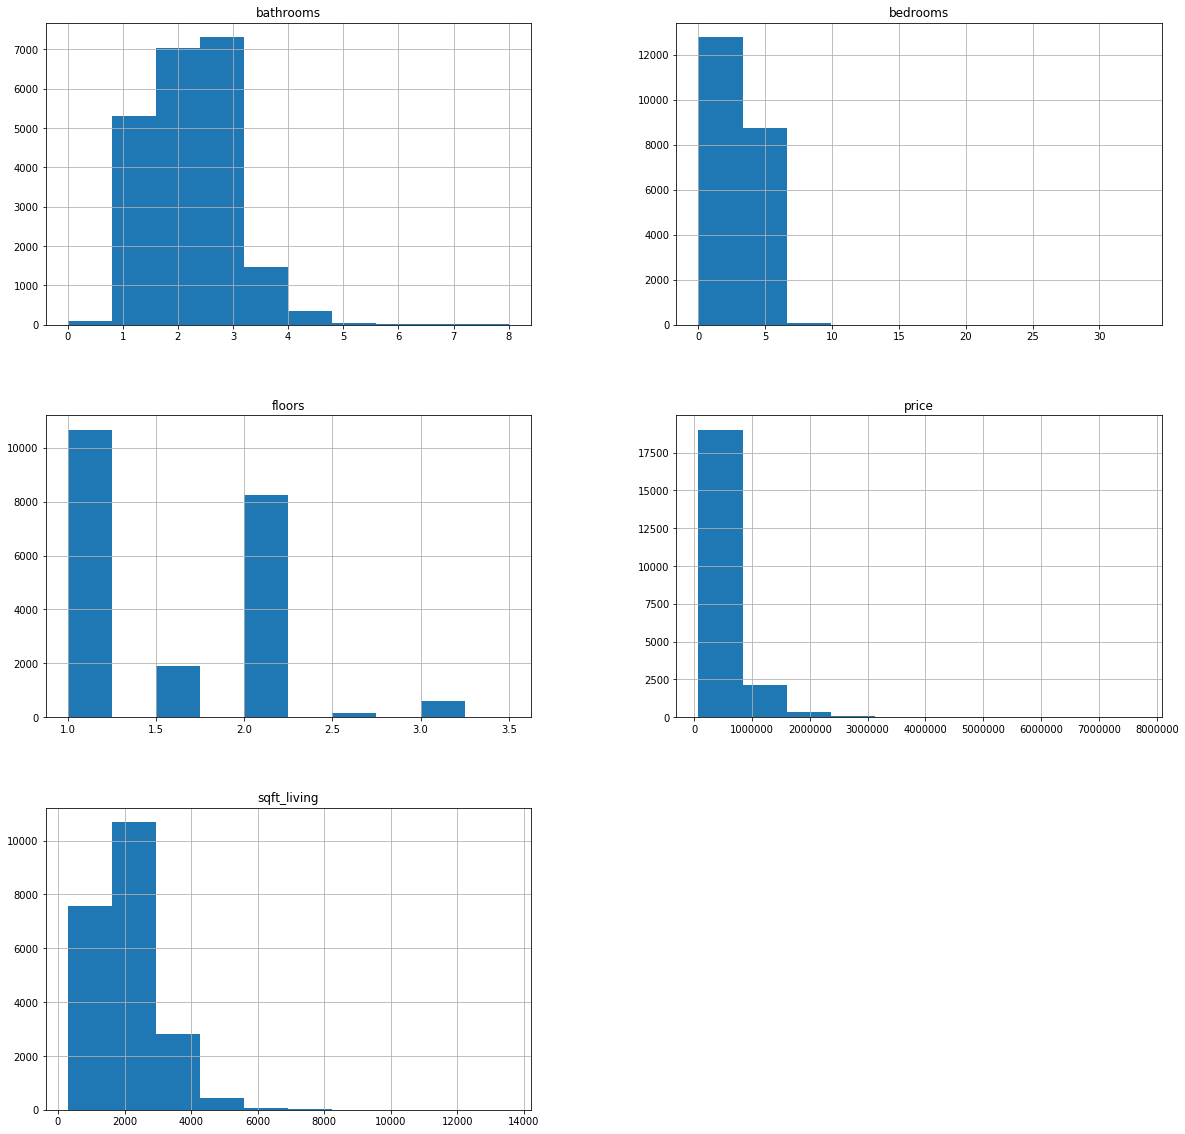

In [38]:
#EDA
dataset3.hist(figsize=(20,20))

In [39]:
dataset3.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


# Model 1:price/sqft_living

In [40]:
# Dataset with only price values
y2=dataset3.iloc[:,:1]
y2.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [41]:
# Dataset with only sqft_living values
x3=dataset3.iloc[:,1:2]
x3.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


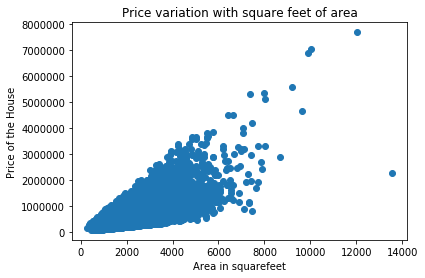

In [42]:
# Scatterplot
plt.scatter(x3,y2)
plt.title('Price variation with square feet of area')
plt.ylabel('Price of the House')
plt.xlabel('Area in squarefeet')
plt.show()

In [43]:
# Splitting the test and train values train=80% and test=20%
x_train,x_test,y_train,y_test=train_test_split(x3,y2,test_size=0.2,random_state=2)

In [44]:
# Model building
lin_reg=LinearRegression()

In [45]:
# Train the model
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lin_reg.coef_

array([[280.67382569]])

In [47]:
lin_reg.intercept_

array([-42568.70358496])

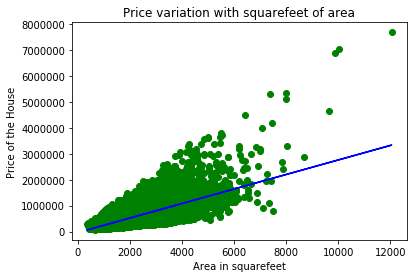

In [48]:
# Scatterplot of Training Dataset
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,lin_reg.predict(x_train),color='blue')
plt.title('Price variation with squarefeet of area')
plt.ylabel('Price of the House')
plt.xlabel('Area in squarefeet')
plt.show()

In [49]:
# Test the model
ypred=lin_reg.predict(x_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

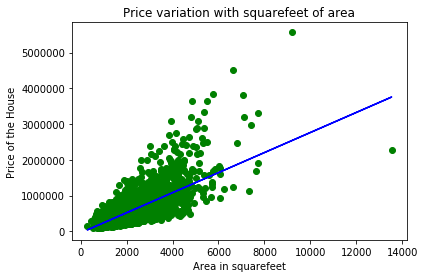

In [50]:
# Scatterplot of Testing Dataset
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,lin_reg.predict(x_test),color='blue')
plt.title('Price variation with squarefeet of area')
plt.ylabel('Price of the House')
plt.xlabel('Area in squarefeet')
plt.show()

In [51]:
# Estimate the cost
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print("The R Square value is....",r_square)
print("The RMSE value is....",RMSE)

The R Square value is.... 0.5031163723285275
The RMSE value is.... 263380.00189817196


# Inference from the above analysis
Here we get the R Square value as 0.5,
which means fifty percent of the variance in the Price can be explained by the Square feet Area.
Hence,it is called a Good Fit.

# Model 2:price/bedrooms

In [52]:
# Dataset with only price values
y2=dataset3.iloc[:,:1]
y2.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [53]:
# Dataset with only bedrooms values
x4=dataset3.iloc[:,2:3]
x4.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


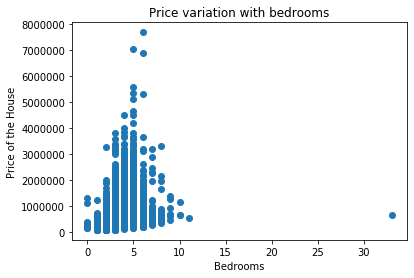

In [54]:
plt.scatter(x4,y2)
plt.title('Price variation with bedrooms')
plt.ylabel('Price of the House')
plt.xlabel('Bedrooms')
plt.show()

In [55]:
# Splitting the test and train values train=80% and test=20%
x_train,x_test,y_train,y_test=train_test_split(x4,y2,test_size=0.2,random_state=2)

In [56]:
# Model building
lin_reg=LinearRegression()

In [57]:
# Train the model
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lin_reg.coef_

array([[118660.62797869]])

In [59]:
lin_reg.intercept_

array([139952.87593386])

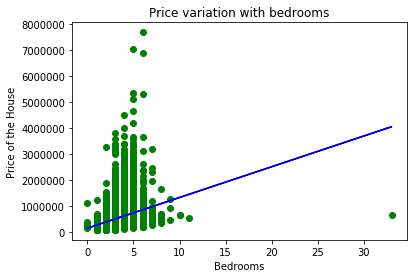

In [60]:
# Scatterplot of Training Dataset
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,lin_reg.predict(x_train),color='blue')
plt.title('Price variation with bedrooms')
plt.ylabel('Price of the House')
plt.xlabel('Bedrooms')
plt.show()

In [61]:
# Test the model
ypred=lin_reg.predict(x_test)
ypred

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

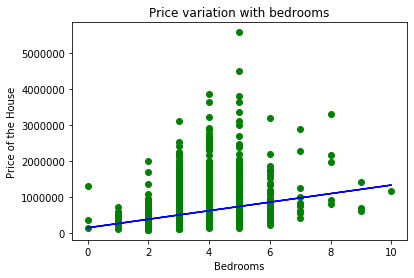

In [62]:
# Scatterplot of Testing Dataset
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,lin_reg.predict(x_test),color='blue')
plt.title('Price variation with bedrooms')
plt.ylabel('Price of the House')
plt.xlabel('Bedrooms')
plt.show()

In [63]:
# Estimate the cost
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print("The R Square value is....",r_square)
print("The RMSE value is....",RMSE)

The R Square value is.... 0.10886345250291596
The RMSE value is.... 352717.96541876445


# Inference from the above analysis
Here we get the R Square value as 0.1,
which means ten percent of the variance in the Price can be explained by the Bedrooms.
Hence,it is called a Poor Fit.

# Model 3:price/bathrooms

In [64]:
# Dataset with only price values
y2=dataset3.iloc[:,:1]
y2.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [65]:
# Dataset with only bathrooms values
x5=dataset3.iloc[:,3:4]
x5.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


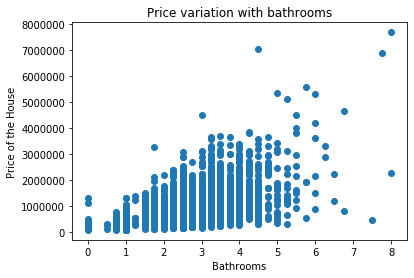

In [66]:
plt.scatter(x5,y2)
plt.title('Price variation with bathrooms')
plt.ylabel('Price of the House')
plt.xlabel('Bathrooms')
plt.show()

In [67]:
# Splitting the test and train values train=80% and test=20%
x_train,x_test,y_train,y_test=train_test_split(x5,y2,test_size=0.2,random_state=2)

In [68]:
# Model building
lin_reg=LinearRegression()

In [69]:
# Train the model
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
lin_reg.coef_

array([[249143.95803858]])

In [71]:
lin_reg.intercept_

array([13073.9957529])

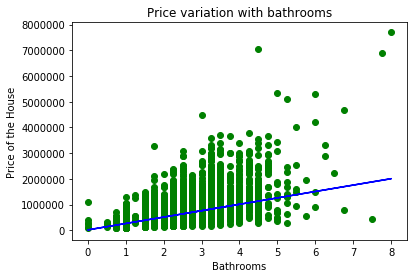

In [72]:
# Scatterplot of Training Dataset
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,lin_reg.predict(x_train),color='blue')
plt.title('Price variation with bathrooms')
plt.ylabel('Price of the House')
plt.xlabel('Bathrooms')
plt.show()

In [73]:
# Test the model
ypred=lin_reg.predict(x_test)
ypred

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

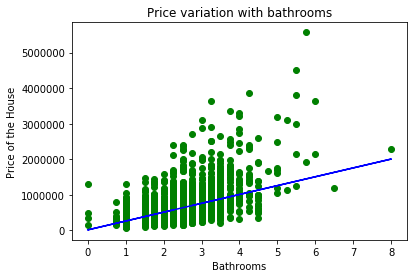

In [74]:
# Scatterplot of Testing Dataset
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,lin_reg.predict(x_test),color='blue')
plt.title('Price variation with bathrooms')
plt.ylabel('Price of the House')
plt.xlabel('Bathrooms')
plt.show()

In [75]:
# Estimate the cost
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print("The R Square value is....",r_square)
print("The RMSE value is....",RMSE)

The R Square value is.... 0.28122887124177365
The RMSE value is.... 316774.90190998075


# Inference from the above analysis
Here we get the R Square value as 0.28,
which means twenty eight percent of the variance in the Price can be explained by the Bathrooms.
Hence,it is called a Poor Fit.

# Model 4:price/floors

In [76]:
# Dataset with only price values
y2=dataset3.iloc[:,:1]
y2.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [77]:
# Dataset with only floors values
x6=dataset3.iloc[:,4:5]
x6.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


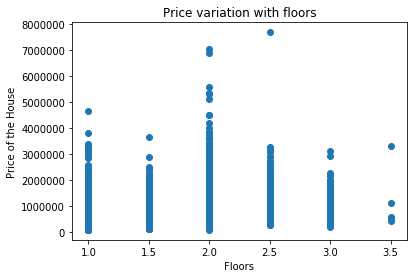

In [78]:
plt.scatter(x6,y2)
plt.title('Price variation with floors')
plt.ylabel('Price of the House')
plt.xlabel('Floors')
plt.show()

In [79]:
# Splitting the test and train values train=80% and test=20%
x_train,x_test,y_train,y_test=train_test_split(x6,y2,test_size=0.2,random_state=2)

In [80]:
# Model building
lin_reg=LinearRegression()

In [81]:
# Train the model
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
lin_reg.coef_

array([[171376.44562902]])

In [83]:
lin_reg.intercept_

array([283309.93245028])

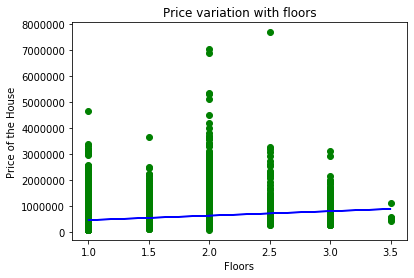

In [84]:
# Scatterplot of Training Dataset
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,lin_reg.predict(x_train),color='blue')
plt.title('Price variation with floors')
plt.ylabel('Price of the House')
plt.xlabel('Floors')
plt.show()

In [85]:
# Test the model
ypred=lin_reg.predict(x_test)
ypred

array([[540374.60089382],
       [454686.37807931],
       [454686.37807931],
       ...,
       [626062.82370833],
       [454686.37807931],
       [540374.60089382]])

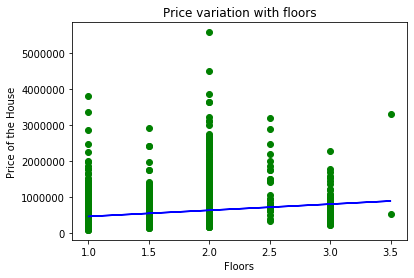

In [87]:
# Scatterplot of Testing Dataset
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,lin_reg.predict(x_test),color='blue')
plt.title('Price variation with floors')
plt.ylabel('Price of the House')
plt.xlabel('Floors')
plt.show()

In [88]:
# Estimate the cost
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print("The R Square value is....",r_square)
print("The RMSE value is....",RMSE)

The R Square value is.... 0.0733487976687478
The RMSE value is.... 359677.77234107786


# Inference from the above analysis
Here we get the R Square value as 0.07,
which means seven percent of the variance in the Price can be explained by the Floors.
Hence,it is called a Poor Fit.